# Question 1

Several NLP systems are as follows: information extraction (IE); conversational agents (CAs); machine translation (MT); language modelling (LM); text classification (TC); and sentiment analysis (SA). These systems and their applications will now be explicated in further detail. 

IE is the process of extracting meaning or information from raw unstructured text. The meaning could aim to identify key pattens or larger contexts. One such example could be forming a list of geographical locations from a tourism document to identify popular destinations. Since the vast majority of language based data is unstructured, IE is a vital technique. Prior to inferring meaning, text mining must take place which is the process of structuring text, often in a tabular form. There are many possible sources of the raw text. Some examples are articles, social media or reviews.

CAs are used in conjunction with speech recognition systems to perform various tasks. They often incorporate question-answering systems. Such tasks could include playing a specified song or setting reminders. In some cases CA may be deployed not for practical gain but simply to be capable of discussing a topic on which they are trained, say films.

MT is the process by which text in one language is translated into another. It is often used in conjunction with other NLP processes. For example, when performing SA, ML could be used to determine the sentiment towards an object in multiple languages, not just one. MT began using rule-based systems then statistical systems. Nowadays, it is generally reliant upon deep Neural Networks. A concern for MT is that performance can often be biased towards languages for which there is more digitised text meaning generally western languages. 

LM uses probabilistic and statistical methods to determine the likelihood of a word or series of words existing within a certain sentence. Again this can be a component of other processes in text generation models like question-answering systems. Another application is the next word prediction tool build into many messaging platforms.

TC models have a discrete output, the number of output classes can be two (binary classifier) or more. One example could be the allocation of books to the century they were written where input data is the text from the books and the output classes are the century bands. TC could be viewed as a particular type of information extraction since the allocation of raw documents to classes is a form of structured data which conveys meaning. 

SA is a particularly important type of TC. In SA the classes are sentiments, positive and negative in a binary system of degrees of classification in a multi-classification system, say 1-5 stars.



# Question 2

There are many sources of ambiguity in natural language. They are all broadly problematic for the same reason. Although this is not always the case we presume a particular sentence or token has one meaning. If we are make accurate predictive judgements, concerning or based upon such text segments, we must discover the singular meaning and eliminate alternatives. This is way a large part of text preprocessing involves text normalisation which aims at disambiguation, that is removing ambiguity. Several types of ambiguity are as follows, these will be elucidated in further detail below: lexical ambiguity (LA); synonyms; semantic ambiguity; syntactic ambiguity; and non-literal speech  
LA refers to the fact that the same word can refer to multiple objects. For example, the word ‘bark’ can refer to the sound a dog makes or the coating on a tree. Thus, when an NLP algorithm attempts to extract the meaning from a single token it is not always clear what the reference-object thus meaning of said token is. Likewise it might equivocate the same two tokens adding predictive weight to one which doesn’t belong. This is a one to many system. 

Synonyms complicate NLP since one meaning can be represented by multiple words. In SA for example, the term ‘happy’ may be recognised while the term euphoric, also indicating positive sentiment, may not and not have predictive weight attached. This is a many to one system.

Between lexical and synonymic ambiguity, word mapping is a many to many system which is highly complex to navigate. Such a system creates context dependence meaning it is impossible to guarantee the correct meaning has been inferred. 

Semantics refer to word meanings and semantic ambiguity is another problem for NLP models. As we saw with LA a word can refer to multiple objects yet even when a word refers to one objects it can contain different meanings within sentence segments. For example the phrase ‘the dog’ could refer to a specific dog or the entire species of dogs. This again makes extracting the correct meaning from these tokens extremely challenging and somewhat context dependent. 

Syntax refers to the grammar or underlying architecture of natural languages. Meaning sometimes depends on the particular syntax of a term of sentence, for example, whether a token is an adjective or adverb or which words are linked. Problematically, however, there are often many way to syntactically break down a statement. For example, in the statement ‘ate a pasta with lettuce from Paris’ the component ‘from Paris’ could attach to the ‘pasta’ component or the ‘lettuce’ component or both. 

The issue of syntactic ambiguity is compounded due to fact that different languages have different syntax. For example, Chinese often contains no spaces. This could create a challenge for a model classifying the beginning of sentences since there may add predictive weight to spaces. Similarly, German can contain long compound words which would be treated as several tokens in most languages. Inversely, in English sometimes terms are hyphenated to indicate one token yet since preprocessing often strips all punctuation, this composite token would be erroneously split into and treated as two tokens. Since syntax can be an important input feature for models, the non-uniformity of syntax can be a problem for MT in particular. 

Finally, the various forms of non-literal speech can be problematic for NLP since meaning cannot be taken at face value. In fact they can have the opposite meaning and the issue is not solved by manually tagging them correctly as this may skew the predictions away from the correct output in the case of similar statements where the meaning is literal. Form of non-literal speech include metaphors and irony.  

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split as split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk import MLEProbDist
from nltk import FreqDist
import matplotlib.pyplot as plt
import pylab
from tqdm import tqdm
import nltk
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE

# Question 3

This dataset was downloaded from [kaggle](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis) with the intent of performing sentiment analysis and a frequency distribution over all the tokens.

# Load the data

In [2]:
# Train-test dataset
df = pd.read_csv('/Users/isaaclambert/Desktop/twitter_sa/twitter_training.csv')

# Validation dataset
df_validation = pd.read_csv('/Users/isaaclambert/Desktop/twitter_sa/twitter_validation.csv')

# Question 4

Tokenization is the process of splitting a language segment into its individual tokens. Tokens are the atomic components of a sentence. Tokens usually refer to the individual words in a sentence yet this is not always the case. As seen above, hyphenated terms can represent one token since although they are two terms, they refer to one family or one object. The collation of the types of tokens in a language corpora constitutes the vocabulary. 

Lemmatization reduces the various forms of a works to the basic form so that they can be treated as the same token. For example plurals may be made singular and past tenses present. Accordingly, dogs would be come dog and ate would become eat. 

Morphology analyses how words are composites of smaller components termed morphemes. A morpheme is the minimal component which still contains meaning. Two types of morphemes are stems and affixes. Stems can exist alone (free morpheme) or only in conjunction an affix (bound morpheme). Stems are the root of words to which affixes can be added. Affixes can be inflectional or derivational. Inflectional affixes such as -est simply change the syntactic function of a word while derivational affixes can alter the meaning dramatically, say adding -un.

Stemming is the process of reducing words to their stem. This is achieved by removing any affixes.

# Text Normalization / Preprocessing 

In [3]:
# Rename columns and insert label values
df_renamed = df.rename(columns={"Positive": "Label", "im getting on borderlands and i will murder you all ,"
: "Reviews"}).replace('Positive', 1).replace('Negative', 0)

# Delete unnecessary colums 
df_no_columns = df_renamed.drop(columns=['Borderlands', '2401'])

In [4]:
# Transform into a binary classifcation problem by deleting "Neutral" class
# Also resets indexes and deltes origional
df_binary = df_no_columns[(df_no_columns['Label'] == 0) | (df_no_columns['Label'] == 1)].reset_index(drop=True)

In [5]:
#display(df_binary)

In [6]:
def labels_to_int_and_text_to_list(df):
    '''
    ouputs labels df with ints + reviews as a list
    '''
    # Take columns of just the review and labels
    reviews = df['Reviews']
    labels_object = df['Label']

    # Convert reviews column to list
    lst = reviews.tolist()

    # Change labels dtype from obj to int
    lab2 = labels_object.astype({'Label':'int'})
    
    return lst, lab2


In [7]:
# Call function labels_to_int_and_text_to_list
reviews_lst, labels = labels_to_int_and_text_to_list(df_binary)

In [8]:
def object_type_finder(lst):
    '''
    Function to determine object types in list 
    '''
    types = [type(i) for i in lst]
    return set(types)

In [9]:
print(object_type_finder(reviews_lst)) 
# Some reviews are floats, these will need to be turned into strings

# Convert all object types to strings for reviews
reviews_lst_str = [str(i) for i in reviews_lst]

# Check with object_type_finder function
print(object_type_finder(reviews_lst_str))
# Types are now exlusively strings

{<class 'float'>, <class 'str'>}
{<class 'str'>}


In [10]:
def lower_and_nonums(lst):
    '''
    Takes lists of reviews and makes them all lower case + removes numbers
    '''
    
    # Makes new list with lowercase strings
    lower_str = [i.lower() for i in lst]
    
    # Make new list without numbers
    nums = r'[0-9]'
    low_nonum = [re.sub(nums, '', i) for i in lower_str]
    
    return low_nonum

In [11]:
# Call function lower_and_nonums
tt_low_nonum = lower_and_nonums(reviews_lst_str)

In [12]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/isaaclambert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
def nest_tokenize_no_punct(lst):
    '''
    outputs a nested list with sentances outer and tokens inner + removes punctuation
    '''
    
    # Form nested list with reviews split into tokens
    token_nested_lst = [word_tokenize(i) for i in lst]
    
    # Remove punctuation tokens
    no_p_n = [[ii for ii in i if ii.isalpha()] for i in token_nested_lst]
    
    return no_p_n


In [14]:
# Call function nest_tokenize_no_punct
no_punct_nested = nest_tokenize_no_punct(tt_low_nonum)

In [15]:
# Download for lemmatizatoin
nltk.download('wordnet')

def stem_or_lem(nested_lst, norm):
    '''
    For Stemming data norm == 'stem' | for lemmatizing data norm == 'lem'
    '''
    if norm == 'stem':
        ps = PorterStemmer()
        ste = [[ps.stem(ii) for ii in i] for i in nested_lst]
        return ste
    
    elif norm == 'lem':
        lemmatizer = WordNetLemmatizer()
        lemmat = [[lemmatizer.lemmatize(ii) for ii in i] for i in nested_lst]
        return lemmat

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/isaaclambert/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# Call stem_or_lem for Stemming
stemmed = stem_or_lem(no_punct_nested, 'stem')

In [17]:
# Call stem_or_lem for Lemitization
lemmatized = stem_or_lem(no_punct_nested, 'lem')

In [18]:
# NESTED LISTS
# stemmed
# lemmatized

In [19]:
def token_extractor(lst):
    '''
    takes a nested list and output tokens as flat list

    '''
    empty_lst = []
    for i in lst:
        for ii in i:
            empty_lst.append(ii)
            
    return empty_lst


In [20]:
# TOKENS 
# Call function token extractor for lists of stemmed and lemmatized tokens
stemmed_tokens = token_extractor(stemmed)
lemma_tokens = token_extractor(lemmatized)

In [21]:
def nested_lst_to_df(nested_lst, label):
    '''
    takes nested token list and outputs df with sentance segmetns and lables
    '''
    flat_lst = [' '.join(i) for i in nested_lst]
    df = pd.DataFrame(flat_lst, columns = ['Reviews'])
    df = pd.concat([df, label], axis=1)
    return df   

In [22]:
# DATAFRAMES
# Call nested_lst_to_df function to make complete stem and lem dfs
df_stemmed = nested_lst_to_df(stemmed, labels)
df_lemma = nested_lst_to_df(lemmatized, labels)

In [23]:
# display finalised normalized datasets below, stemmed on left and lemmatized on right
complete_df = pd.concat([df_stemmed, df_lemma ], axis=1)
display(complete_df)

,Reviews,Label,Reviews,Label
0,i am come to the border and i will kill you all,1,i am coming to the border and i will kill you all,1
1,im get on borderland and i will kill you all,1,im getting on borderland and i will kill you all,1
2,im come on borderland and i will murder you all,1,im coming on borderland and i will murder you all,1
3,im get on borderland and i will murder you me all,1,im getting on borderland and i will murder you...,1
4,im get into borderland and i can murder you all,1,im getting into borderland and i can murder yo...,1
...,...,...,...,...
43368,just realiz that the window partit of my mac i...,1,just realized that the window partition of my ...,1
43369,just realiz that my mac window partit is year ...,1,just realized that my mac window partition is ...,1
43370,just realiz the window partit of my mac is now...,1,just realized the window partition of my mac i...,1
43371,just realiz between the window partit of my ma...,1,just realized between the window partition of ...,1


In [123]:
# The stemmed data will be used for the sentiment analysis classification task 
    # as this performs well with the K-nearest neigbours model in question 9
    # accordingly stemming is used again in 16 with the validation set 

# partly for variety / seeing how lemmitized data performs and partly because 
    # lemmatized data can perform better than stemmed the lemmatized data was used 
    # for the language modeling 

# Question 5

Constructing an NLP algorithm is an iterative process involving many stages. It beings with text normalisation or preprocessing. This can involved: tokenization; making words lower case; stripping punctuation; lemmatization or stemming and more. 

The next stage is splitting the data into training and test segments. 

Following this, the text will have to be vectorized. There are a number of methods for doing this such as bag of words which enumerates tokens with their count in the document or TF-IDF which weights the importance of a term in a document against a corpus of documents outputting a float. There are also N-grams which treat collections of tokens as single vectors. Some tokens such as the stop words vocabulary may also be removed. This process will generate the number of input features as well as affecting the training and test accuracy. 

As such, different vectorisation methods may be tested on a model and the accuracies and number of features compared to find a good equilibrium between accuracy and processing expenditure. 

Once, a good vectorisation method has been selected different types of model may be trailed and compared.

Once the best model has been selected it will need to have it hyperparamaters tuned. This can be done with grid search which will rerun the training and tested until the optimal configuration of hyperparamaters is found.

Finally, the model will be tested on totally novel data at which point error metrics can be introduced and analysed.

# Question 6 

Although rule based classification is feasible for this task since there are many rules exceptions, a supervised learning language model would be preferable. This would be a binary problem with the output classes being, beginning of sentence and not beginning of sentence.

First an appropriate language corpus would need to be downloaded. The data would need to be labelled, one method of doing so would be to add a token to signify the beginning of sentences such as S* in the correct positions. Thus a position before a token with an S* would be positive and one without would be negative. 

Punctuation should not be stripped in normalization and these could be important predictive features. Likewise they should not be made lower case as whether there is a capitalised token or not is a predictive feature. Since in this problem token word length following an S* token can also be important and we are not concerned with the meanings of words, tokens should not lemmatised or stemmed. 

Tokens could be vectorized in bi-grams where the token pairs which contain an S* , that is Paris token pairs which precede and follow the end of a sentence could be treated as positive. 

The steps outlined in 5 with model selection and parameter tuning would then be followed 

Finally the model could be applied to novel text corpuses adding S* tokens where positives are predicted. The S* token could then be used as a delimiter separating sentences into rows on a data frame.

# Split  data
Split the data psudeo-randomly into train and test sets with a function 'splittt'.

In [24]:
def splittt(df):
    '''
    split data with train_test_split import
    '''
    x = df["Reviews"]
    y = df["Label"]
    train_x, test_x, train_y, test_y = split(x, y, test_size=0.25, random_state=21, shuffle=True)
    return train_x, test_x, train_y, test_y

In [25]:
# Call splittt function 
s_train_x, s_test_x, s_train_y, s_test_y = splittt(df_stemmed)
l_train_x, l_test_x, l_train_y, l_test_y = splittt(df_lemma)

# Vectorization

In [26]:
# Begin with standard TF-IDF vectorization - more complex methods will be tested in question 16
tfidf = TfidfVectorizer()

def vectorize(vec, train_x, test_x):
    '''
    vectorizes the train and test data with TF-IDF
    '''
    vec.fit(train_x)
    v_train = vec.transform(train_x)
    v_test = vec.transform(test_x)
    
    return v_train, v_test
    

In [27]:
# Call vectorize function to vectorize X input train and test
stem_train_v, stem_test_v = vectorize(tfidf, s_train_x, s_test_x)
lem_train_v, lem_test_v = vectorize(tfidf, l_train_x, l_test_x)


# Question 7

K-nearest neighbours (KNN) is intuitive, it simply tags points which are close to the pre-existing points with the same labels. It is has no assumptions about the data, that is it is non-parametric meaning bias is unlikely to be high. There are no training steps which is good for computational processing. It evolves from new instances. It can be used for can be used for binary and multi-class problems as well as regression. 

Despite this, speed and efficiency decreases as the dataset size increases. It struggles in higher dimensional feature spaces to make predictions. Features must be homogenous, that is scaled in the same manner. The distance hyper-parameter makes KNN very sensitive to outliers.

Multinomial Naive Bayes (MNB) calculates probability meaning it can be applied to continue and discrete datasets. It can be applied to large data sets, that is it is very scalable. Can apply to binary on multi-class problems. 

The MNB cannot be used for regression and finding independent features to apply to a MNB can be challenging.

Decision Trees (DTs) are transparent, the decision pathways are easily followed. Missing values are simply ignored. The data does not have to be scaled.

Boundary lines are only along orthogonal axes so data sometimes needs to be rotated. Small changes in the data can cause large structural shifts in the DT. Relative to the same data size, DTs can be computationally more expensive.

# Question 8

A processing pipeline (PP) is a series of stages where the output of one stage is the input of the next. In NLP PPs aim to take raw unstructured data and clean and structure it so that it can be input into a model. Cleaning data may involve the normalisation steps outlined in 4 as well as things like punctuation stripping. Structuring data may involve segmenting sentences and putting them in data frame rows adjacent to their relevant Y-term or label.

# Question 9

This is achieved by first creating test and train segments with the input X and output Y variables. The inputs are then vectorized. The model will then be fit to the training data by inputting the vectorised X variable and Y labels to use as targets. Train accuracy will be recorded. The model will then be tested by inputing the vectorized X test segment. It’s predictions will be compared agains the test labels to determine test accuracy. This whole process may then be repeated with different vectorisers and hyper-parameters repeatedly until the model is tuned to produce the best test results. Finally, the model may be tested on totally novel data. 

# Import Models

In [28]:
models = {'K-nearest neighbours': KNeighborsClassifier(),
          'Descision Tree': DecisionTreeClassifier(),
          'MultinomialNB': MultinomialNB()}

# Train and test the models

In [29]:
def train_models(normalizer, train_v, train_y, test_v, test_y):
    '''
    Fit models then output df with train and test accuracy 
    '''
    dic_models = {'Normalizer': [], 'Model': [], 'Training accuracy': [], 'Test accuracy': []}
    
    
    for i, ii in models.items():
        ii.fit(train_v, train_y)
        
        dic_models['Normalizer'].append(normalizer)
        dic_models['Model'].append(i)
        dic_models['Training accuracy'].append("{:.2%}".format(ii.score(train_v, train_y)))
        dic_models['Test accuracy'].append("{:.2%}".format(ii.score(test_v, test_y)))
    
    df_results = pd.DataFrame.from_dict(dic_models)
    return df_results 


In [30]:
# Call train_models to produce results for stemming dataset
stem_resutls = train_models('stemming', stem_train_v, s_train_y, stem_test_v, s_test_y )

In [31]:
# Call train_models to produce results for lemitization dataset
lem_resutls = train_models('lemitization', lem_train_v, l_train_y, lem_test_v, l_test_y )

In [32]:
# Combines both dfs with alternating rows then resets indexes
all_results_df = pd.concat([stem_resutls, lem_resutls]).sort_index().reset_index(drop=True)

display(all_results_df)

,Normalizer,Model,Training accuracy,Test accuracy
0,stemming,K-nearest neighbours,95.97%,92.95%
1,lemitization,K-nearest neighbours,95.88%,92.22%
2,stemming,Descision Tree,98.31%,87.30%
3,lemitization,Descision Tree,98.31%,87.01%
4,stemming,MultinomialNB,89.11%,86.77%
5,lemitization,MultinomialNB,90.15%,87.38%


For the decision tree, the train accuracy is very hight but decreases significantly for the test accuracy suggesting overfitting. The Naive Bayes model is consistent but has lower accuracy than the K-nearest neighbours model (KNM) which is also consistent. Although the lemmatised data generally performs marginally better, the stemmed data performs marginally better in conjunction with the KNM suggesting this is the best combination.

# Question 10

In [33]:
def generate_tokens_freq(tokens):
    '''
    outputs dictionary of tokens (keys) + count (values)
    '''
    dic={}
    for i in tokens:
        dic[i]=0
    for i in tokens:
        dic[i]+=1
    return dic

In [34]:
# Call generate_tokens_freq with Lemmatized tokens
token_count = generate_tokens_freq(lemma_tokens)

In [35]:
def generate_ngrams(tokens,k):
    '''
    creats lists of N-grams where K = N  
    '''
    l=[]
    i=0
    while(i<len(tokens)):
        l.append(tokens[i:i+k])
        i=i+1
    l=l[:-1]
    return l


In [36]:
# Call generate_ngrams
bigrams = generate_ngrams(lemma_tokens,2)

In [37]:
def generate_ngram_freq(bi):
    '''
    Ouput dictionary with bigrams and their counts
    '''
    dic={}
    for i in bi:
        st=" ".join(i)
        dic[st]=0
    for i in bi:
        st=" ".join(i)
        dic[st]+=1
    return dic


In [38]:
# Call generate_ngram_freq
bi_counts_dic = generate_ngram_freq(bigrams)

In [ ]:
# Sort bi-gram counts and calulate rank 
sorted_bi_freq = sorted(bi_counts_dic.values(), reverse=True)
rank = range(1, len(sorted_bi_freq) + 1)

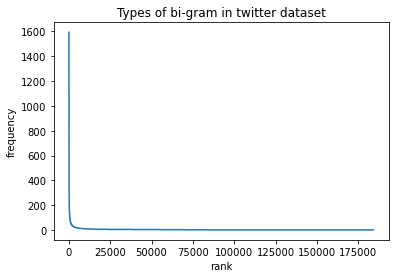

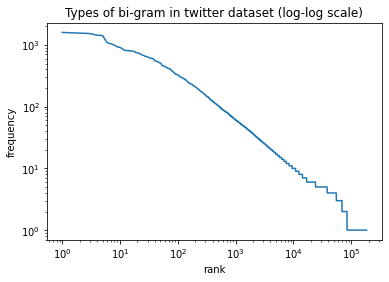

There are more combinations of uni-grams then uni-grams so the rank will increase for bi-grams 
but the bi-gram counts will decrease.


In [40]:
def make_plot(x, y, xlab, ylab, title, scale):
    '''
    Generates plot with log scale option
    '''
    fig = pylab.figure()
    pylab.plot(x, y)
    pylab.xlabel(xlab)
    pylab.ylabel(ylab)
    pylab.title(title)
    if scale == "log":
        pylab.xscale('log')
        pylab.yscale('log')
    pylab.draw()
    pylab.pause(1)
    pylab.close(fig)

# Call make_plot x2
make_plot(rank, sorted_bi_freq, "rank", "frequency", "Types of bi-gram in twitter dataset", "linear")
make_plot(rank, sorted_bi_freq, "rank", "frequency", "Types of bi-gram in twitter dataset (log-log scale)", "log")

print('There are more combinations of uni-grams then uni-grams so the rank will increase for bi-grams \nbut the bi-gram counts will decrease.' )

In [41]:
# Make list of distinct lemmatized tokens
distinct_tokens = list(set(sorted(lemma_tokens)))

In [42]:
def find1(s,bi_counts_dic):
    try:
        return bi_counts_dic[s]
    except:
        return 0
def print_probability_table(distinct_tokens,dct,bi_counts_dic):
    '''
    Compute bi-gram probabilites as matrix 
    '''
    n=len(distinct_tokens)
    l=[[]*n for i in range(n)]
    for i in range(n):
        denominator = dct[distinct_tokens[i]]
        for j in range(n):
            numerator = find1(distinct_tokens[i]+" "+distinct_tokens[j],bi_counts_dic)
            l[i].append(float("{:.3f}".format(numerator/denominator)))
    return l

In [43]:
# Call print_probability_table
probability_table=print_probability_table(distinct_tokens,token_count,bi_counts_dic)

In [44]:
# BI-GRAM TESTER
## enter two uni-grams to test in strings

gram1 = "I"
gram2 = "am"

In [45]:
# Form list of N-grams
test_gram = [gram1,gram2]

# Call lower_and_nonums
low_test = lower_and_nonums(test_gram)

# Make the list nested
low_test_nest = [low_test]

In [46]:
# Call stem_or_lem
lem_gram_test = stem_or_lem(low_test_nest,'lem')

In [47]:
# Output probabilty for chosen bigram

print(f'Condtional probabily of bi-gram: {gram1} {gram2}')

s=1

for i in lem_gram_test:
    k=distinct_tokens.index(i[0])
    m=distinct_tokens.index(i[1])
    print("P('{}')\t=  ".format(' '.join(i)),probability_table[k][m])
    s*=probability_table[k][m]

Condtional probabily of bi-gram: I am
P('i am')	=   0.034


# Question 11

In [48]:
# TRIGRAMS
trigrams = generate_ngrams(lemma_tokens, 3)
tri_counts_dic = generate_ngram_freq(trigrams)

In [49]:
# FOURGRAMS
fourgrams = generate_ngrams(lemma_tokens, 4)
four_count_dic = generate_ngram_freq(fourgrams)

In [50]:
# get distinct bigrams
distinct_bigrams = list({tuple(i) for i in bigrams})

In [51]:
def find1(s,bi_counts_dic):
    try:
        return bi_counts_dic[s]
    except:
        return 0

# Alter print_probability_table for tri-gram probabilites 
# Data sampled by range set to 100 to avoid long run time
def tri_print_probability_table(distinct_bigrams, distinct_tokens, bi_counts_dic, tri_counts_dic):
    '''
    Compute probability distribution as matrix for trigrams in range 100
    '''
    n=len(distinct_bigrams)
    n1=len(distinct_tokens)
    l=[[]*n1 for i in range(n)]
    for i in tqdm(range(100)):
        denominator = bi_counts_dic[" ".join(distinct_bigrams[i])]
        for j in range(n1):
            numerator = find1(" ".join(distinct_bigrams[i])+" "+distinct_tokens[j], tri_counts_dic)
            l[i].append(float("{:.3f}".format(numerator/denominator)))
    return l

In [52]:
tri_prob_table = tri_print_probability_table(distinct_bigrams, distinct_tokens, bi_counts_dic, tri_counts_dic)

100%|██████████| 100/100 [00:03<00:00, 29.75it/s]


In [53]:
def show_probabilities(distinct_bigrams, distinct_tokens, tri_prob_table, ind):
    '''
    outputs df of possible trigrams and probabilities given a single bigram given by index
    '''
    bigram = " ".join(distinct_bigrams[ind])
    
    prob_dic = {'Trigram': [] , 'Probability': []}

    for i, ii in enumerate(tri_prob_table[ind]):
        if ii == 0:
            continue
        
        prob_dic['Trigram'].append(f"{bigram+' '+distinct_tokens[i]}")
        prob_dic['Probability'].append(ii)
    
    return prob_dic

In [120]:
# choose index to test
ind = 4

In [121]:
# Call function 
single_index = show_probabilities(distinct_bigrams, distinct_tokens, tri_prob_table, ind)

In [122]:
# print single bigram from chosen index 
bigram = " ".join(distinct_bigrams[ind])
print(f"Bigram at index {ind}: {bigram} \n")

print("Showing possible trigrams and associated probability..")

# convert to df and clean 
single_index_df = pd.DataFrame.from_dict(single_index)
single_index_df = single_index_df.sort_values(by=['Probability'], ascending=False)

display(single_index_df.head(10))

Bigram at index 4: s ridiculous 

Showing possible trigrams and associated probability..


,Trigram,Probability
0,s ridiculous and,0.182
6,s ridiculous last,0.182
1,s ridiculous so,0.091
2,s ridiculous very,0.091
3,s ridiculous exactly,0.091
4,s ridiculous homedepot,0.091
5,s ridiculous that,0.091
7,s ridiculous how,0.091
8,s ridiculous little,0.091


In [57]:
# Sort tri-gram counts and calulate rank 
sorted_tri_freq = sorted(tri_counts_dic.values(), reverse=True)
rank_tri = range(1, len(sorted_tri_freq) + 1)

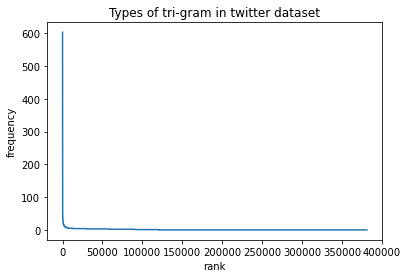

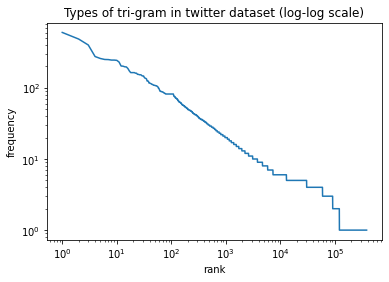

In [58]:
# Plot distribution 
make_plot(rank_tri, sorted_tri_freq, "rank", "frequency", "Types of tri-gram in twitter dataset", "linear")
make_plot(rank_tri, sorted_tri_freq, "rank", "frequency", "Types of tri-gram in twitter dataset (log-log scale)", "log")


In [59]:
# Sort four-gram counts and calulate rank
sorted_four_freq = sorted(four_count_dic.values(), reverse=True)
rank_four = range(1, len(sorted_four_freq) + 1)

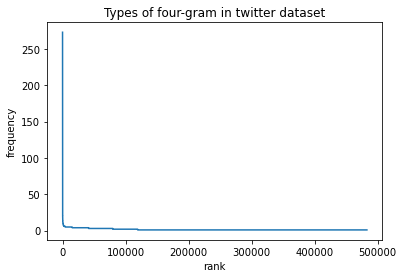

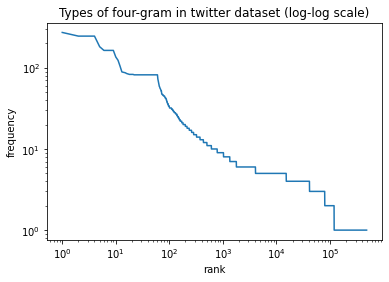

With tri and four-grams there are even lower counts but even more combinations.


In [127]:
# Plot distribution 
make_plot(rank_four, sorted_four_freq, "rank", "frequency", "Types of four-gram in twitter dataset", "linear")
make_plot(rank_four, sorted_four_freq, "rank", "frequency", "Types of four-gram in twitter dataset (log-log scale)", "log")

print('With tri and four-grams there are even lower counts but even more combinations.')

# Question 12

In [61]:
# The functions find1 and print_probabilty_table are adjusted to Laplace's Law for smoothing 
    # +1 to bi_counts_dic[s]
    # return 1 rather than 0 for unseen N-gram 
    # add n (vocab size) to denominator 

def find1_smoothed(s,bi_counts_dic):
    try:
        return bi_counts_dic[s] + 1
    except:
        return 1
def print_smoothed_probability_table(distinct_tokens,dct,bi_counts_dic):
    
    n=len(distinct_tokens)
    l=[[]*n for i in range(n)]
    for i in tqdm(range(n)):
        denominator = dct[distinct_tokens[i]] + n
        for j in range(n):
            numerator = find1_smoothed(distinct_tokens[i]+" "+distinct_tokens[j],bi_counts_dic)
            l[i].append(float("{:.14f}".format(numerator/denominator)))
    return l 

In [62]:
smoothed_probability_table=print_smoothed_probability_table(distinct_tokens,token_count,bi_counts_dic)

100%|██████████| 16424/16424 [07:54<00:00, 34.64it/s]


In [63]:
# Print same bi-gram conditional probablity for lem_gram_test
for i in lem_gram_test:
    k=distinct_tokens.index(i[0])
    m=distinct_tokens.index(i[1])
    print("P-smoothed ('{}')\t=  ".format(' '.join(i)),smoothed_probability_table[k][m])
    s*=smoothed_probability_table[k][m]

print(f'The probabilty for ({gram2}/{gram1}) has decreaced from 0.034 (3sf) to 0.020 (3sf) due to smoothing.')
print('This is because the vocabulary size has been increaced and the probibilty has been distributed between \npreviously unseen N-grams.')


P-smoothed ('i am')	=   0.02013103931179
The probabilty for (am/I) has decreaced from 0.034 (3sf) to 0.020 (3sf) due to smoothing.
This is because the vocabulary size has been increaced and the probibilty has been distributed between 
previously unseen N-grams.


In [64]:
smoothed_sorted_bi_freq = [i+1 for i in sorted_bi_freq]

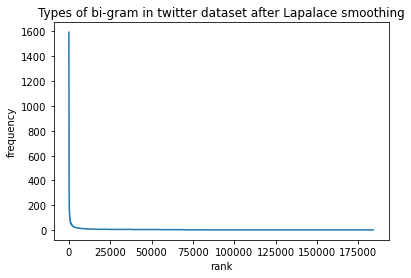

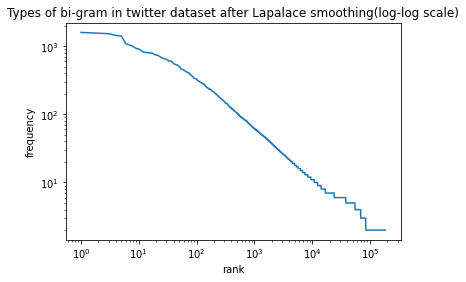

The graphs look almost idential to the non-smoothed bi-gram graphs since the frequency has only been 
increaced by 1 for each bi-gram
The smoothing will make the frequency distribution slightly more even.


In [65]:
# Plot curves for after Laplace smoothing 
make_plot(rank, smoothed_sorted_bi_freq, "rank", "frequency", "Types of bi-gram in twitter dataset after Lapalace smoothing", "linear")
make_plot(rank, smoothed_sorted_bi_freq, "rank", "frequency", "Types of bi-gram in twitter dataset after Lapalace smoothing(log-log scale)", "log")

print('The graphs look almost idential to the non-smoothed bi-gram graphs since the frequency has only been \nincreaced by 1 for each bi-gram')
print('The smoothing will make the frequency distribution slightly more even.')

# Question 13

In [66]:
# copy the lemma_tokens list and assign to new variable 
zipf_lemma_tokens = lemma_tokens.copy()

In [67]:
# define a minimum threshold count for tokens in vocab 
thresh = 25

# replace tokens under this count with 'UNK' token
for i, ii in enumerate(zipf_lemma_tokens):
    if token_count[ii] < thresh:
        zipf_lemma_tokens[i] = 'UNK'

#zipf_lemma_tokens

In [68]:
# Call generate_tokens_freq to provide token count in zipf vocabulary 
zipf_token_count = generate_tokens_freq(zipf_lemma_tokens)

In [69]:
# Call generate_ngrams with k=2 to generate bigrams in zipf vocabulary 
zipf_bigrams = generate_ngrams(zipf_lemma_tokens, 2)

In [70]:
# generate bigram counts in ZIPF vocabulary 
zipf_bi_count_dic = generate_ngram_freq(zipf_bigrams)

In [71]:
# Make list of distinct tokens from ZIPF vocabulary 
zipf_distinct_tokens = list(set(sorted(zipf_lemma_tokens)))

In [72]:
def zipf_find1(s,zipf_bi_count_dic):
    try:
        return zipf_bi_count_dic[s]
    except:
        return 0
def zipf_print_probability_table(zipf_distinct_tokens, dct, zipf_bi_count_dic):
    '''
    Compute bi-gram probabilites as matrix 
    '''
    n=len(zipf_distinct_tokens)
    l=[[]*n for i in range(n)]
    for i in tqdm(range(n)):
        denominator = dct[zipf_distinct_tokens[i]]
        for j in range(n):
            numerator = zipf_find1(zipf_distinct_tokens[i]+" "+zipf_distinct_tokens[j],zipf_bi_count_dic)
            l[i].append(float("{:.3f}".format(numerator/denominator)))
    return l

In [73]:
zipf_prob_table = zipf_print_probability_table(zipf_distinct_tokens, zipf_token_count, zipf_bi_count_dic)

100%|██████████| 2431/2431 [00:11<00:00, 215.61it/s]


In [74]:
# ZIPF'S LAW - BI-GRAM TESTER 
## enter two uni-grams to test in strings - can be sparse words 

gram3 = "We"
gram4 = "Ruminated"

In [75]:
# Make bigram into list 
zipf_test_gram = [gram3, gram4]

# Call lower_and_nonums
zipf_low_test = lower_and_nonums(zipf_test_gram)

# Make the list nested for stem_or_lem function input 
zipf_low_test_nest = [zipf_low_test]

# Call stem_or_lem to lematize bigrams 
zipf_lem_gram_test = stem_or_lem(zipf_low_test_nest,'lem')

# Back to flat list 
pp_zipf_bi_test = token_extractor(zipf_lem_gram_test)
print(pp_zipf_bi_test)

['we', 'ruminated']


In [76]:
# Loop replaces any unknown inputs to gram3 and gram4 with 'UNK' token
for i, ii in enumerate(pp_zipf_bi_test):
    if ii not in zipf_distinct_tokens:
        pp_zipf_bi_test[i] = 'UNK'  
        
print(pp_zipf_bi_test)

['we', 'UNK']


In [77]:
# Convert back to nested list 
nest_pp_zipf_bi_test = [pp_zipf_bi_test]

# Output probabilty for chosen bigram after application of Zipf's Law
print(f'Condtional probabily of bi-gram: {gram3} {gram4}')

s=1

for i in nest_pp_zipf_bi_test:
    k=zipf_distinct_tokens.index(i[0])
    m=zipf_distinct_tokens.index(i[1])
    print("P('{}')\t=  ".format(' '.join(i)),zipf_prob_table[k][m])
    s*=zipf_prob_table[k][m]
    
print(f'\nAlthough there are no count of the bigram {gram3} {gram4} in the language corpus a posative float is still returned.')
print(f'This number is the sum of the probabilites of any uni-gram under the threshold count given unigram: {gram3}')

Condtional probabily of bi-gram: We Ruminated
P('we UNK')	=   0.042

Although there are no count of the bigram We Ruminated in the language corpus a posative float is still returned.
This number is the sum of the probabilites of any uni-gram under the threshold count given unigram: We


In [78]:
# Sort bi-gram counts and calulate rank for Zipf vocabulary
zipf_sorted_bi_freq = sorted(zipf_bi_count_dic.values(), reverse=True)
zipf_rank = range(1, len(zipf_sorted_bi_freq) + 1)

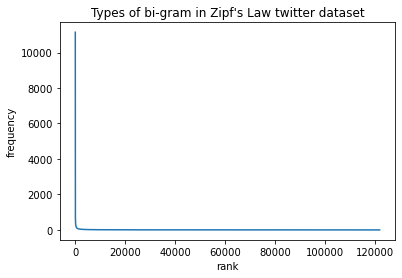

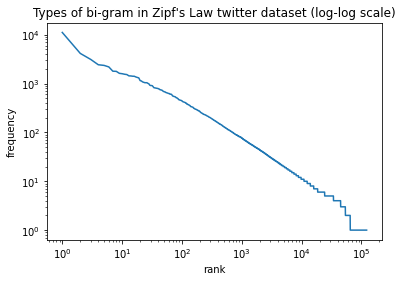

The threshold of 25 has resulted in a higher bigram count for certain bigrams resulting in the 
scale of the Y-axis increacing.
With sparse tokens transformed to a single token the rank is lower.
With higher frequency but lower rank it is unclear whether the distriubtion is more or less even.


In [79]:
# Plot distribution 
make_plot(zipf_rank, zipf_sorted_bi_freq, "rank", "frequency", "Types of bi-gram in Zipf's Law twitter dataset", "linear")
make_plot(zipf_rank, zipf_sorted_bi_freq, "rank", "frequency", "Types of bi-gram in Zipf's Law twitter dataset (log-log scale)", "log")

print(f'The threshold of {thresh} has resulted in a higher bigram count for certain bigrams resulting in the \nscale of the Y-axis increacing.')
print('With sparse tokens transformed to a single token the rank is lower.')
print('With higher frequency but lower rank it is unclear whether the distriubtion is more or less even.')

# Question 14

In [80]:
# In this question we train a simple MLE model using our lemmatized text corpus. 
# We then calculate the perplexity and f score some test sentences.

In [81]:
# Create train and test set for MLE model
perplex_df = df_lemma.sample(frac=1)
perplex_sentences = perplex_df['Reviews'].to_list()
train_sentences = perplex_sentences[:-10]
test_sentences = perplex_sentences[-10:]

In [82]:
# Tokenise tweets
tokenized_text = [list(map(str.lower, nltk.tokenize.word_tokenize(sent))) 
                for sent in train_sentences]

# Fit MLE model to training data
n = 1
train_data, padded_vocab = padded_everygram_pipeline(n, tokenized_text)
model = MLE(n)
model.fit(train_data, padded_vocab)

tokenized_text = [list(map(str.lower, nltk.tokenize.word_tokenize(sent))) 
                for sent in test_sentences]

test_data, _ = padded_everygram_pipeline(n, tokenized_text)

# Calculate the perplexity for 10 examples in the test set. The perplexity is simply the reciprocal 
# of the sentence probabilties. The lower the perplecity the better the model has predicted the sentence.
# The perplexity is normalised by the length of sentence.
for i, test in enumerate(test_data):
    print(f"Sentence: {test_sentences[i]}\nPerplexity: {round(model.perplexity(test), 2)} \n \n")


Sentence: indian government ban pubg pro pubg player streamer
Perplexity: 2999.29 
 

Sentence: why it so hard not to find shit online on amazon i want to buy shit but i refuse to buy it through amazon i had a coffee misfire because i need a new kale but i ca go to irl shop urgg a it not a problem really it just disappointing that avoiding amazon is so hard
Perplexity: inf 
 

Sentence: fascinating stuff waiting for not a second tf comment
Perplexity: 1623.65 
 

Sentence: we were robbed nk
Perplexity: 2882.73 
 

Sentence: amazon is very disappointed with amazon never expected such a pathetic response from the custome support team
Perplexity: 1233.64 
 

Sentence: are they not being sued for their baby powder yet we will trust them with a vaccine please
Perplexity: 790.81 
 

Sentence: why
Perplexity: 368.66 
 

Sentence: there obviously nothing wrong with havoc just three people using it with a lot of ammunition because this stupid as developer doe know how to balance a gun and fix t

# Question 15

In [128]:
# Comments are dispersed throughtout the cells.

# Unsurpringly when the n increaces for n-grams the conditional probality decreaces.
# For the frequency distrbutions as n increaces the rank increases due to more combinations 
    # but the highest frequency counts for the n-grams decrease.
# smoothing distrubutes the probability lowering it for outcomes with a previously high 
    # probabilties but increasing previously low probabilites.
# Zipf's Law increased the probabilty of unlikley or null probailities by combining them.
# The perpexity outlines with examples which sentances are more or less likely

# Question 16

## Validation Dataset preprocessing
The same preprocessing is applied to the validation dataset by calling the same functions. By testing a model on totally novel data, better test accuracy can be determined.

In [83]:
# Rename columns and insert label values
df_validation = df_validation.rename(columns={"Irrelevant": "Label", "I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣" : "Reviews"}).replace('Positive', 1).replace('Negative', 0)

# Delete unnecessary colums 
df_validation = df_validation.drop(columns=['Facebook', '3364'])

In [84]:
# Numerate labels and transform into binary problem
df_validation = df_validation[(df_validation['Label'] == 0) | (df_validation['Label'] == 1)].reset_index(drop=True)


In [85]:
#df_validation

In [86]:
# Call function labels_to_int_and_text_to_list
val_reviews_lst, val_labels = labels_to_int_and_text_to_list(df_validation)

In [87]:
# Call function object_type_finder
print(object_type_finder(val_reviews_lst))

# val_reviews_lst only contains strings so I can continue with preprocessing
## without converting all object types to strings

{<class 'str'>}


In [88]:
# Call function lower_and_nonums
val_low_nonum = lower_and_nonums(val_reviews_lst)

In [89]:
# Call function nest_tokenize_no_punct
val_no_punct_nested = nest_tokenize_no_punct(val_low_nonum)

In [90]:
# Call stem_or_lem with validation set
val_stemmed = stem_or_lem(val_no_punct_nested, 'stem')
val_lem = stem_or_lem(val_no_punct_nested, 'lem')

In [91]:
# VALIDATION DATAFRAMES
# Call nested_lst_to_df for validation df 
val_df_stemmed = nested_lst_to_df(val_stemmed, val_labels)
val_df_lem = nested_lst_to_df(val_lem, val_labels)

In [92]:
val_complete_df = pd.concat([val_df_stemmed, val_df_lem ], axis=1)
display(val_complete_df)

,Reviews,Label,Reviews,Label
0,microsoft whi do i pay for word when it functi...,0,microsoft why do i pay for word when it functi...,0
1,csgo matchmak is so full of closet hack it a t...,0,csgo matchmaking is so full of closet hacking ...,0
2,hi eahelp i ve had madelein mccann in my cella...,0,hi eahelp i ve had madeleine mccann in my cell...,0
3,thank you eamaddennfl new te austin hooper in ...,1,thank you eamaddennfl new te austin hooper in ...,1
4,rocket leagu sea of thiev or rainbow six i lov...,1,rocket league sea of thief or rainbow six i lo...,1
...,...,...,...,...
538,guess i broke,1,guess i broke,1
539,pleas explain how thi is possibl how can they ...,0,please explain how this is possible how can th...,0
540,good on soni as much as i want to see the new ...,1,good on sony a much a i want to see the new p ...,1
541,today suck so it s time to drink wine n play b...,1,today sucked so it s time to drink wine n play...,1


## Improved Vectorization
Different combinations of supplements to the TF-IDF technique are trailed. A range or minimum document frequency (MDF), the removal of a dictionary of 'stop words' (SW) and a range of N-grams are all tested.


In [93]:
# Dictionary with descriptions as keys and iterative vectorization techniques
vectors = { 'Base ': TfidfVectorizer(),
            'SW ': TfidfVectorizer(stop_words="english"),
            'SW , MDF(2)': TfidfVectorizer(stop_words="english", min_df=2),
            'SW , MDF(3)': TfidfVectorizer(stop_words="english", min_df=3),
            'SW , MDF(5)': TfidfVectorizer(stop_words="english", min_df=5),
            'SW , MDF(2) , N-grams(1-2)': TfidfVectorizer(stop_words="english", min_df=2, ngram_range=(1,2)),
            'SW , MDF(5) , N-gram(1-3)': TfidfVectorizer(stop_words="english", min_df=5, ngram_range=(1,3))}

In [94]:
# This will record the results 
vec_results_dic = {'Vectorizer':[], 'Feature count':[], 'Training accuracy':[], 'Test accuracy':[]}

In [95]:
for i, ii in vectors.items():
    
    # Create from stemmed vocabulary 
    ii.fit(s_train_x)
    vs_train = ii.transform(s_train_x)
    vs_test = ii.transform(s_test_x)
    
    # Fit the data to K-nearest neighbours model 
    knn = models['K-nearest neighbours'].fit(X=vs_train , y=s_train_y)
    
    # Add results to vec_results_dic
    vec_results_dic['Vectorizer'].append(i)
    vec_results_dic['Feature count'].append(len(ii.get_feature_names()))
    vec_results_dic['Training accuracy'].append("{:.2%}".format(knn.score(vs_train, s_train_y)))
    vec_results_dic['Test accuracy'].append("{:.2%}".format(knn.score(vs_test, s_test_y)))

In [96]:
vec_stem_results_df = pd.DataFrame.from_dict(vec_results_dic)
display(vec_stem_results_df)

,Vectorizer,Feature count,Training accuracy,Test accuracy
0,Base,12536,95.97%,92.95%
1,SW,12325,95.12%,91.73%
2,"SW , MDF(2)",9288,95.41%,91.86%
3,"SW , MDF(3)",7912,95.53%,92.59%
4,"SW , MDF(5)",5303,95.15%,92.04%
5,"SW , MDF(2) , N-grams(1-2)",58624,94.52%,90.14%
6,"SW , MDF(5) , N-gram(1-3)",20733,94.77%,90.65%


* N-Grams increase the feature count yet to not improve the accuracy so they will not be used.
* The SW MDF(3) combination has similar accuracy to the base TF-IDF but reduces the feature count by 37% which is good for processing power.


## Cross Validation

Cross Validation is used to compare different models, it also rotates the train-test data improving variance .

In [97]:
# Numbers of folds == 5
c_validate = KFold(n_splits=5, random_state=42, shuffle=True)

# drop decision tree and add SVC
models2 = {'K-nearest neighbours': KNeighborsClassifier(),
           'MultinomialNB': MultinomialNB(),
           'Linear SVC' :  LinearSVC() }

# Create vocabulary with the optimal vectorizer (SW, MDF(3))
optimal_vec_fitted =  TfidfVectorizer(stop_words="english", min_df=3).fit(s_train_x)
opt_vs_train = optimal_vec_fitted.transform(s_train_x)
opt_vs_test = optimal_vec_fitted.transform(s_test_x)

cross_val_res_dic = {'Classifier':[], 'Training accuracy':[], 'Standard deviation':[] }

In [98]:
for i, ii in models2.items():
    # Perform cross-validation
    cv = cross_val_score(estimator=ii, X=opt_vs_train, y=s_train_y, cv=c_validate)
    
    # Add results to cross_val_res_dic
    cross_val_res_dic['Classifier'].append(i)
    cross_val_res_dic['Training accuracy'].append("{:.2%}".format(cv.mean()))
    cross_val_res_dic['Standard deviation'].append("{:.2%}".format(cv.std()))
    

In [99]:
df_cross_val_res = pd.DataFrame.from_dict(cross_val_res_dic)
display(df_cross_val_res)

,Classifier,Training accuracy,Standard deviation
0,K-nearest neighbours,88.20%,0.25%
1,MultinomialNB,85.78%,0.20%
2,Linear SVC,89.52%,0.20%


* The linear SVC has the highest accuracy and lowest standard deviation so it is the clear winner

## Grid Search

Grid Search is used to optimise tuning the model hyperparamaters, it trails all combinations and returns the optimal configuration.

In [100]:
# Show hyper-parameters for this type of model
print(LinearSVC().get_params())

{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [101]:
# import a non-scaled RBF model
svc = models2['Linear SVC']

# This is the regulization hyper-parameter which will determine whether the model if overfit or underfit
c = np.array([0.1, 1, 2.5, 5])

grid = GridSearchCV(estimator=svc, param_grid=dict(C=c))

grid.fit(X=opt_vs_train, y=s_train_y);

In [102]:
print(f'Best values for {grid.best_params_}')
print(f'training accuracy: {grid.best_score_:.2%}')
print(f'Test accuracy: {grid.score(opt_vs_test, s_test_y):.2%}')

Best values for {'C': 2.5}
training accuracy: 89.82%
Test accuracy: 89.87%


* a C value of 2.5 outputs the high test/train accuracy without overfitting.

In [103]:
# Fit the optimized tuned model with the optimized data
opt_scv = LinearSVC(C=2.5).fit(X=opt_vs_train, y=s_train_y)

## Confusion Matrix and validation dataset

In [104]:
# Tranform the stemmed validation dataset 
stemmed_val_with_opt_vector = optimal_vec_fitted.transform(val_df_stemmed['Reviews'])

In [105]:
# Get label predictions for validation dataset
pred_val_y = opt_scv.predict(stemmed_val_with_opt_vector) 

In [106]:
# convert actual validation label to array
actual_val_y = val_labels.to_numpy()

In [107]:
def func_met_df(a, p):
    '''
    Calculates metrics and returns dataframe
    '''
    met_lst = [['Accuracy', metrics.accuracy_score(a, p)],
               ['Precision', metrics.precision_score(a, p)],
               ['Sensitivity/recall', metrics.recall_score(a, p)],
               ['Specificity', metrics.recall_score(a, p, pos_label=0)],
               ['F1_score', metrics.f1_score(a, p)]]
                            
    
    df = pd.DataFrame(met_lst)
    df.columns =['Metric', 'Value']
    return df


In [108]:
# Call met_df with actual and predicted labels
met_df = func_met_df(actual_val_y, pred_val_y )

In [109]:
met_df

,Metric,Value
0,Accuracy,0.952118
1,Precision,0.953069
2,Sensitivity/recall,0.953069
3,Specificity,0.951128
4,F1_score,0.953069


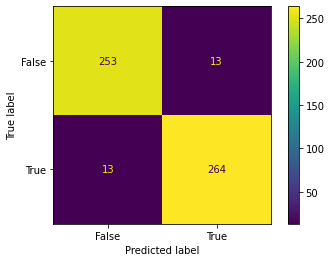

In [110]:
# Import and plot confusion matrix 
confusion_matrix = metrics.confusion_matrix(actual_val_y, pred_val_y)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

On totally novel data the model performs well. The count of false negatives and positives is low, both at 13. Furthermore, the model scores well in all the performance metrics seen in the dataframe above.

# Markdown word count 
* 2499

# References
* [Ambiguity in NLP, 16/11/22](https://cs.nyu.edu/~davise/ai/ambiguity.html)

* [MNB - strengths and weaknesses, Great Learning, 22/11/22](https://www.fromthegenesis.com/pros-and-cons-of-k-nearest-neighbors/)

* [KNN - strengths and weaknesses, Genesis, 22/11/22](https://www.fromthegenesis.com/pros-and-cons-of-k-nearest-neighbors/)
* [Q10 Q11 Q13 Q14 Minakshee Narayankar, 23/11/22](https://medium.com/codex/statistical-language-model-n-gram-to-calculate-the-probability-of-word-sequence-using-python-2e54a1084250)
* Visulazation of frequency distribution, Lab session on Text Normalization and Language Model (part1), Mahsa Abazari, 23/11/22
* [Q14, mujjiga, 24/11/22](https://stackoverflow.com/questions/54941966/how-can-i-calculate-perplexity-using-nltk)
* [Confusion matrix and metrics, W3Schools, 19/11/22](https://www.w3schools.com/python/python_ml_confusion_matrix.asp)